In [1]:
# 환경세팅

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer,Dense,Flatten,Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.datasets import fashion_mnist
import os # 파일(디렉토리,폴더)다루기 - 폴더 생성

In [2]:
# 답지 라벨링
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
labels[0]

'T-shirt/top'

In [4]:
# 패션데이터 불러오기
# (train문제, train답지),(test문제, test답지) =   fashion_mnist.load_data()
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [6]:
X_train[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  84,
         97, 110, 108,  87,  97,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 255, 199,
        183, 142, 161, 200, 213,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 174, 173,
        158, 131, 132, 176, 176,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 180, 163,
        120, 180, 126, 139, 168, 122,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156, 180, 162,
        171, 170, 183, 163, 169, 144,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 177, 163,
        174, 166, 173, 170, 163, 148,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 160, 182, 160,
        168, 175, 167, 157, 168, 139,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 143, 185, 161,
        171, 184, 176, 160, 175, 131,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 143, 188, 155,
        172, 182, 180, 161, 182, 127,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 127, 170, 168,
        175, 211, 191, 163, 184, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 132, 175,
        177, 129, 203, 161, 187, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  91, 166, 163,
        190,  63, 203, 159, 189,  94,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  98, 126, 166,
        192,  65, 198, 167, 193,  84,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 127, 170,
        198,  61, 200, 174, 198,  71,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  93, 141, 151,
        207,  55, 196, 171, 196,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 137, 136,
        210,  54, 198, 173, 199,  46,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 125, 131,
        214,  55, 199, 176, 200,  38,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 146, 126,
        210,  56, 200, 175, 200,  37,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 237, 171,
        195,  64, 199, 174, 203,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 190, 168,
        192,  70, 196, 171, 203,  30,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 188, 171,
        196,  70, 198, 173, 202,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 187, 172,
        197,  71, 199, 174, 203,  15,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 183, 175,
        198,  73, 195, 174, 205,  13,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 186, 177,
        200,  78, 191, 175, 171,   8,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

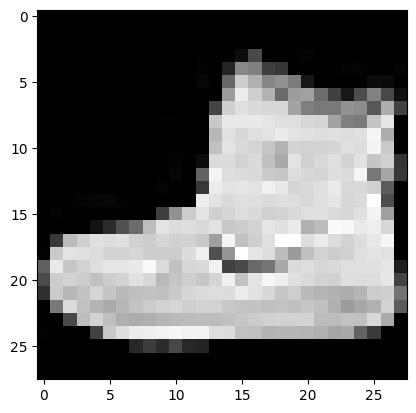

In [7]:
# X_train[0] 이미지 보기
plt.imshow(X_train[0], cmap='gray')

In [8]:
# 답지 확인
y_train[0]

9

In [9]:
labels[y_train[0]]

'Ankle boot'

In [10]:
# 원핫인코딩
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [11]:
# 원래 답지
print(y_train[10])
# 원핫인코딩 답지
print(y_train_oh[10])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# 데이터 분리과정
# train data -> train data + validation data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_oh,y_val_oh = train_test_split(
    X_train,y_train_oh,test_size=0.2,random_state=42
)

In [13]:
print(X_train.shape,'원본데이터')
print(X_val.shape)
print(X_test.shape)
print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(48000, 28, 28) 원본데이터
(12000, 28, 28)
(10000, 28, 28)
(48000, 10)
(12000, 10)
(10000, 10)


### 모델 설계
- Conv2D는 4차원 데이터 형식이 필요함
 -  Conv2D(총개수,행,열,채널수)
 - (48000, 28, 28) -> (48000, 28, 28,1)
 - 채널 1: 흑백
 - 채널 3: 컬러

### 차원수 늘리기
 - reshape

In [18]:
X_train.shape[0],X_train.shape[1],X_train.shape[2]

(48000, 28, 28)

In [19]:
# reshape
#X_train = X_train.reshape(48000,28,28,1)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
# 답지크기 확인
print(X_train.shape,X_val.shape,X_test.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


### 이미지 노멀라이징
 - 원본: 0 ~ 255
 - 노멀라이징 : 0 ~ 1

In [20]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [21]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [23]:
type(X_train)

numpy.ndarray

In [24]:
# 타입변경 int -> float
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

In [25]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### 모델 설계

In [26]:
# CNN

model1 = Sequential()
# Conv2D(커널수,필터사이즈,padding,activation,input_shape) 첫번째
# Conv2D(커널수,필터사이즈,padding,activation) 두번째 부터
# Padding = 'valid' or 'same'
model1.add(Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
# MLP
# 3차원 이미지 데이터를 1차원으로 바꿔줘야 한다
# Flatten()
model1.add(Flatten())
# MLP 중간층
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=32, activation='relu'))
# MLP 출력층
model1.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# compile
model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    #optimizer='adam',
    metrics=['accuracy']
)

In [30]:
# 모델학습
h1 = model1.fit(
    X_train,y_train_oh,
    validation_data=(X_val,y_val_oh),
    epochs=5,
    batch_size=50
)

Epoch 1/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7216 - loss: 0.7456 - val_accuracy: 0.8710 - val_loss: 0.3618
Epoch 2/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8689 - loss: 0.3610 - val_accuracy: 0.8923 - val_loss: 0.2969
Epoch 3/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8900 - loss: 0.3012 - val_accuracy: 0.9049 - val_loss: 0.2640
Epoch 4/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9026 - loss: 0.2681 - val_accuracy: 0.9045 - val_loss: 0.2588
Epoch 5/5
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2438 - val_accuracy: 0.9052 - val_loss: 0.2557


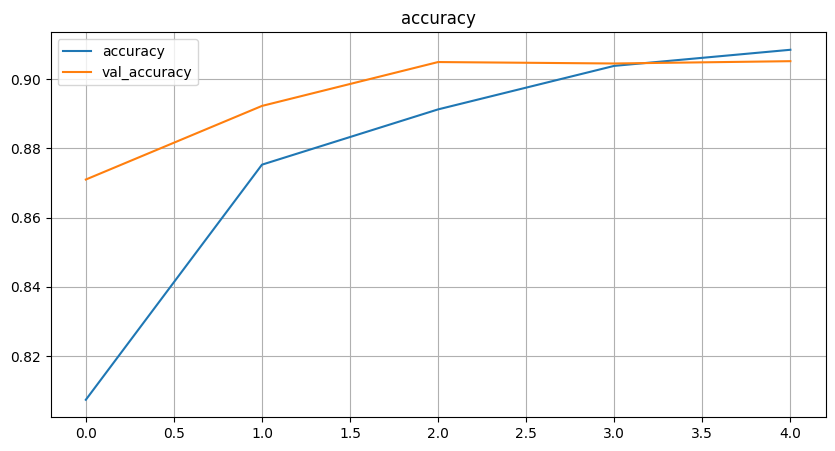

In [31]:
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(h1.history['accuracy'], label='accuracy')
plt.plot(h1.history['val_accuracy'], label='val_accuracy')
plt.grid() # 그래프 격자무늬
plt.legend() # 범례
plt.title('accuracy')
plt.show()

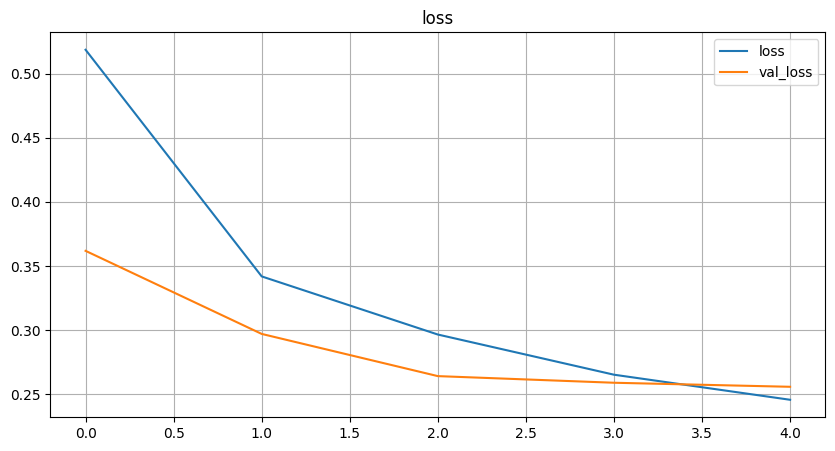

In [32]:
# 학습결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.grid() # 그래프 격자무늬
plt.legend() # 범례
plt.title('loss')
plt.show()

In [33]:
# 모델 평가
model1.evaluate(X_test,y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9034 - loss: 0.2732


[0.2705954611301422, 0.9000999927520752]